In [4]:
import numpy as np
import pywt  # pywaveletes

import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
curve = np.loadtxt('sample_row_avg.dat')
curve.shape

(14696,)

In [11]:
pywt.wavelist()

['bior1.1',
 'bior1.3',
 'bior1.5',
 'bior2.2',
 'bior2.4',
 'bior2.6',
 'bior2.8',
 'bior3.1',
 'bior3.3',
 'bior3.5',
 'bior3.7',
 'bior3.9',
 'bior4.4',
 'bior5.5',
 'bior6.8',
 'cgau1',
 'cgau2',
 'cgau3',
 'cgau4',
 'cgau5',
 'cgau6',
 'cgau7',
 'cgau8',
 'cmor',
 'coif1',
 'coif2',
 'coif3',
 'coif4',
 'coif5',
 'coif6',
 'coif7',
 'coif8',
 'coif9',
 'coif10',
 'coif11',
 'coif12',
 'coif13',
 'coif14',
 'coif15',
 'coif16',
 'coif17',
 'db1',
 'db2',
 'db3',
 'db4',
 'db5',
 'db6',
 'db7',
 'db8',
 'db9',
 'db10',
 'db11',
 'db12',
 'db13',
 'db14',
 'db15',
 'db16',
 'db17',
 'db18',
 'db19',
 'db20',
 'db21',
 'db22',
 'db23',
 'db24',
 'db25',
 'db26',
 'db27',
 'db28',
 'db29',
 'db30',
 'db31',
 'db32',
 'db33',
 'db34',
 'db35',
 'db36',
 'db37',
 'db38',
 'dmey',
 'fbsp',
 'gaus1',
 'gaus2',
 'gaus3',
 'gaus4',
 'gaus5',
 'gaus6',
 'gaus7',
 'gaus8',
 'haar',
 'mexh',
 'morl',
 'rbio1.1',
 'rbio1.3',
 'rbio1.5',
 'rbio2.2',
 'rbio2.4',
 'rbio2.6',
 'rbio2.8',
 'rbio3.1',

In [12]:
w = pywt.Wavelet('haar')
cA, cD = pywt.dwt(curve, wavelet=w)

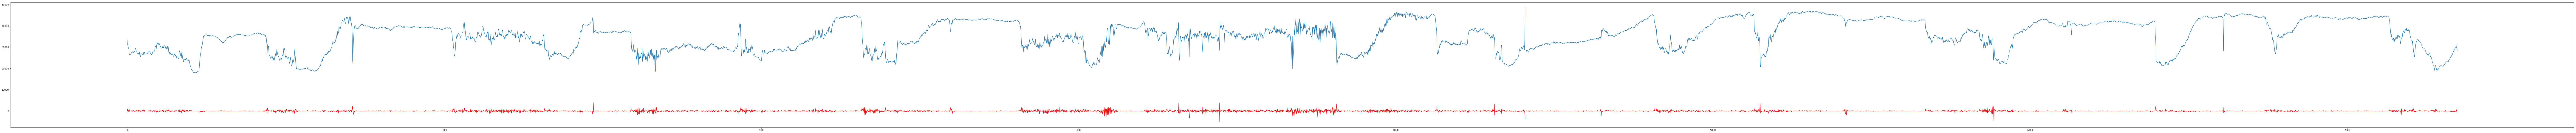

In [13]:
fig, ax = plt.subplots(figsize=(200,10))

ax.plot(np.arange(cA.size), cA)
ax.plot(np.arange(cD.size), cD, color='red')

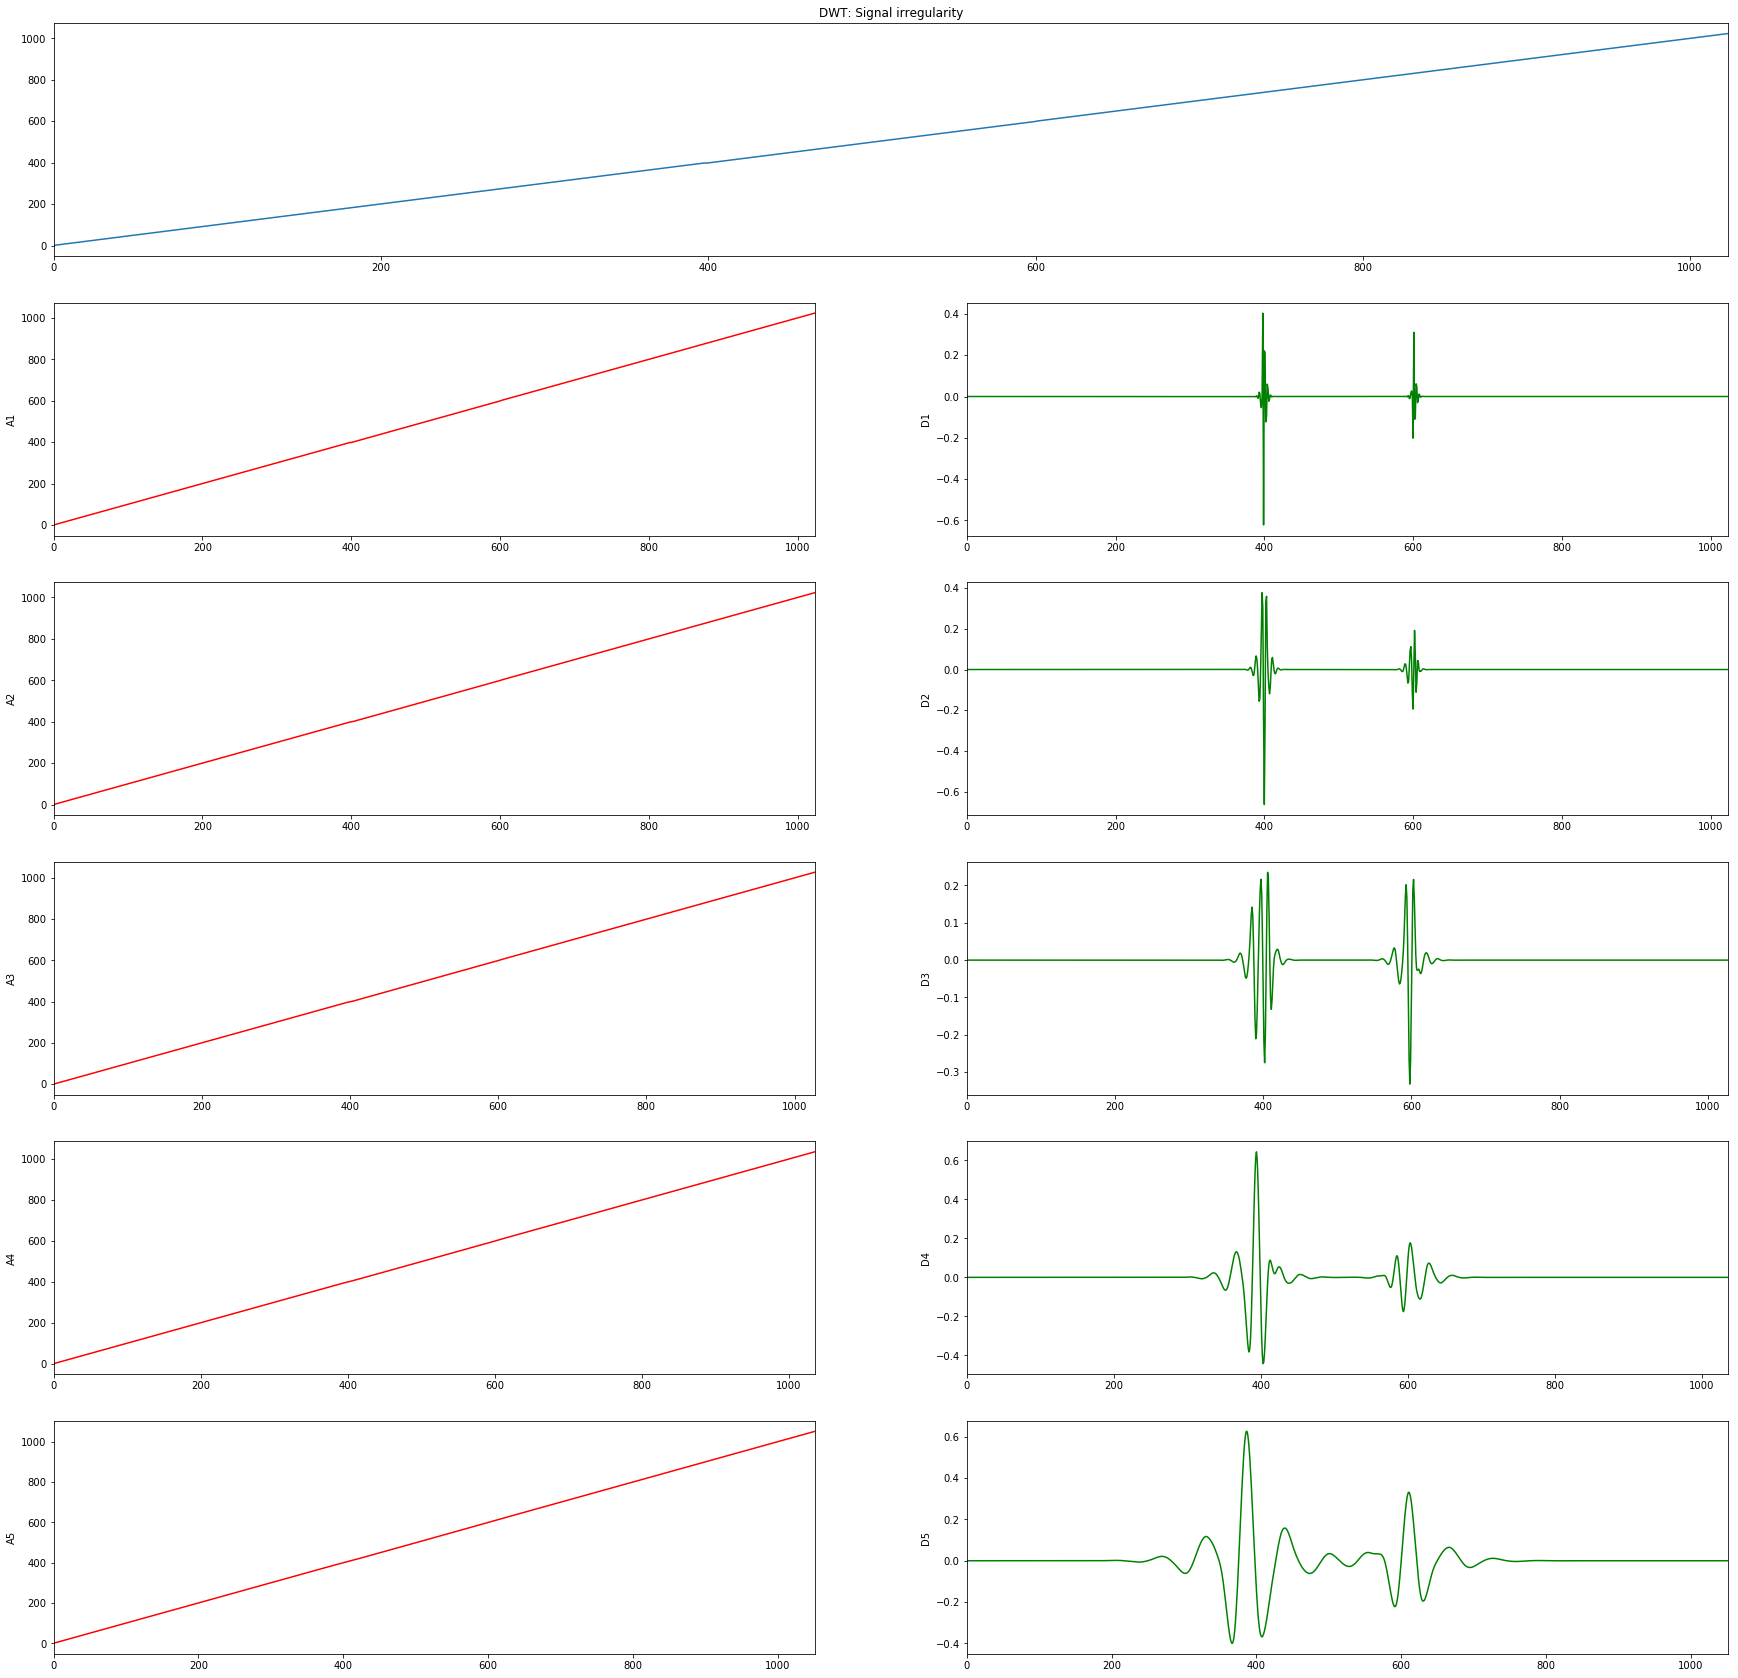

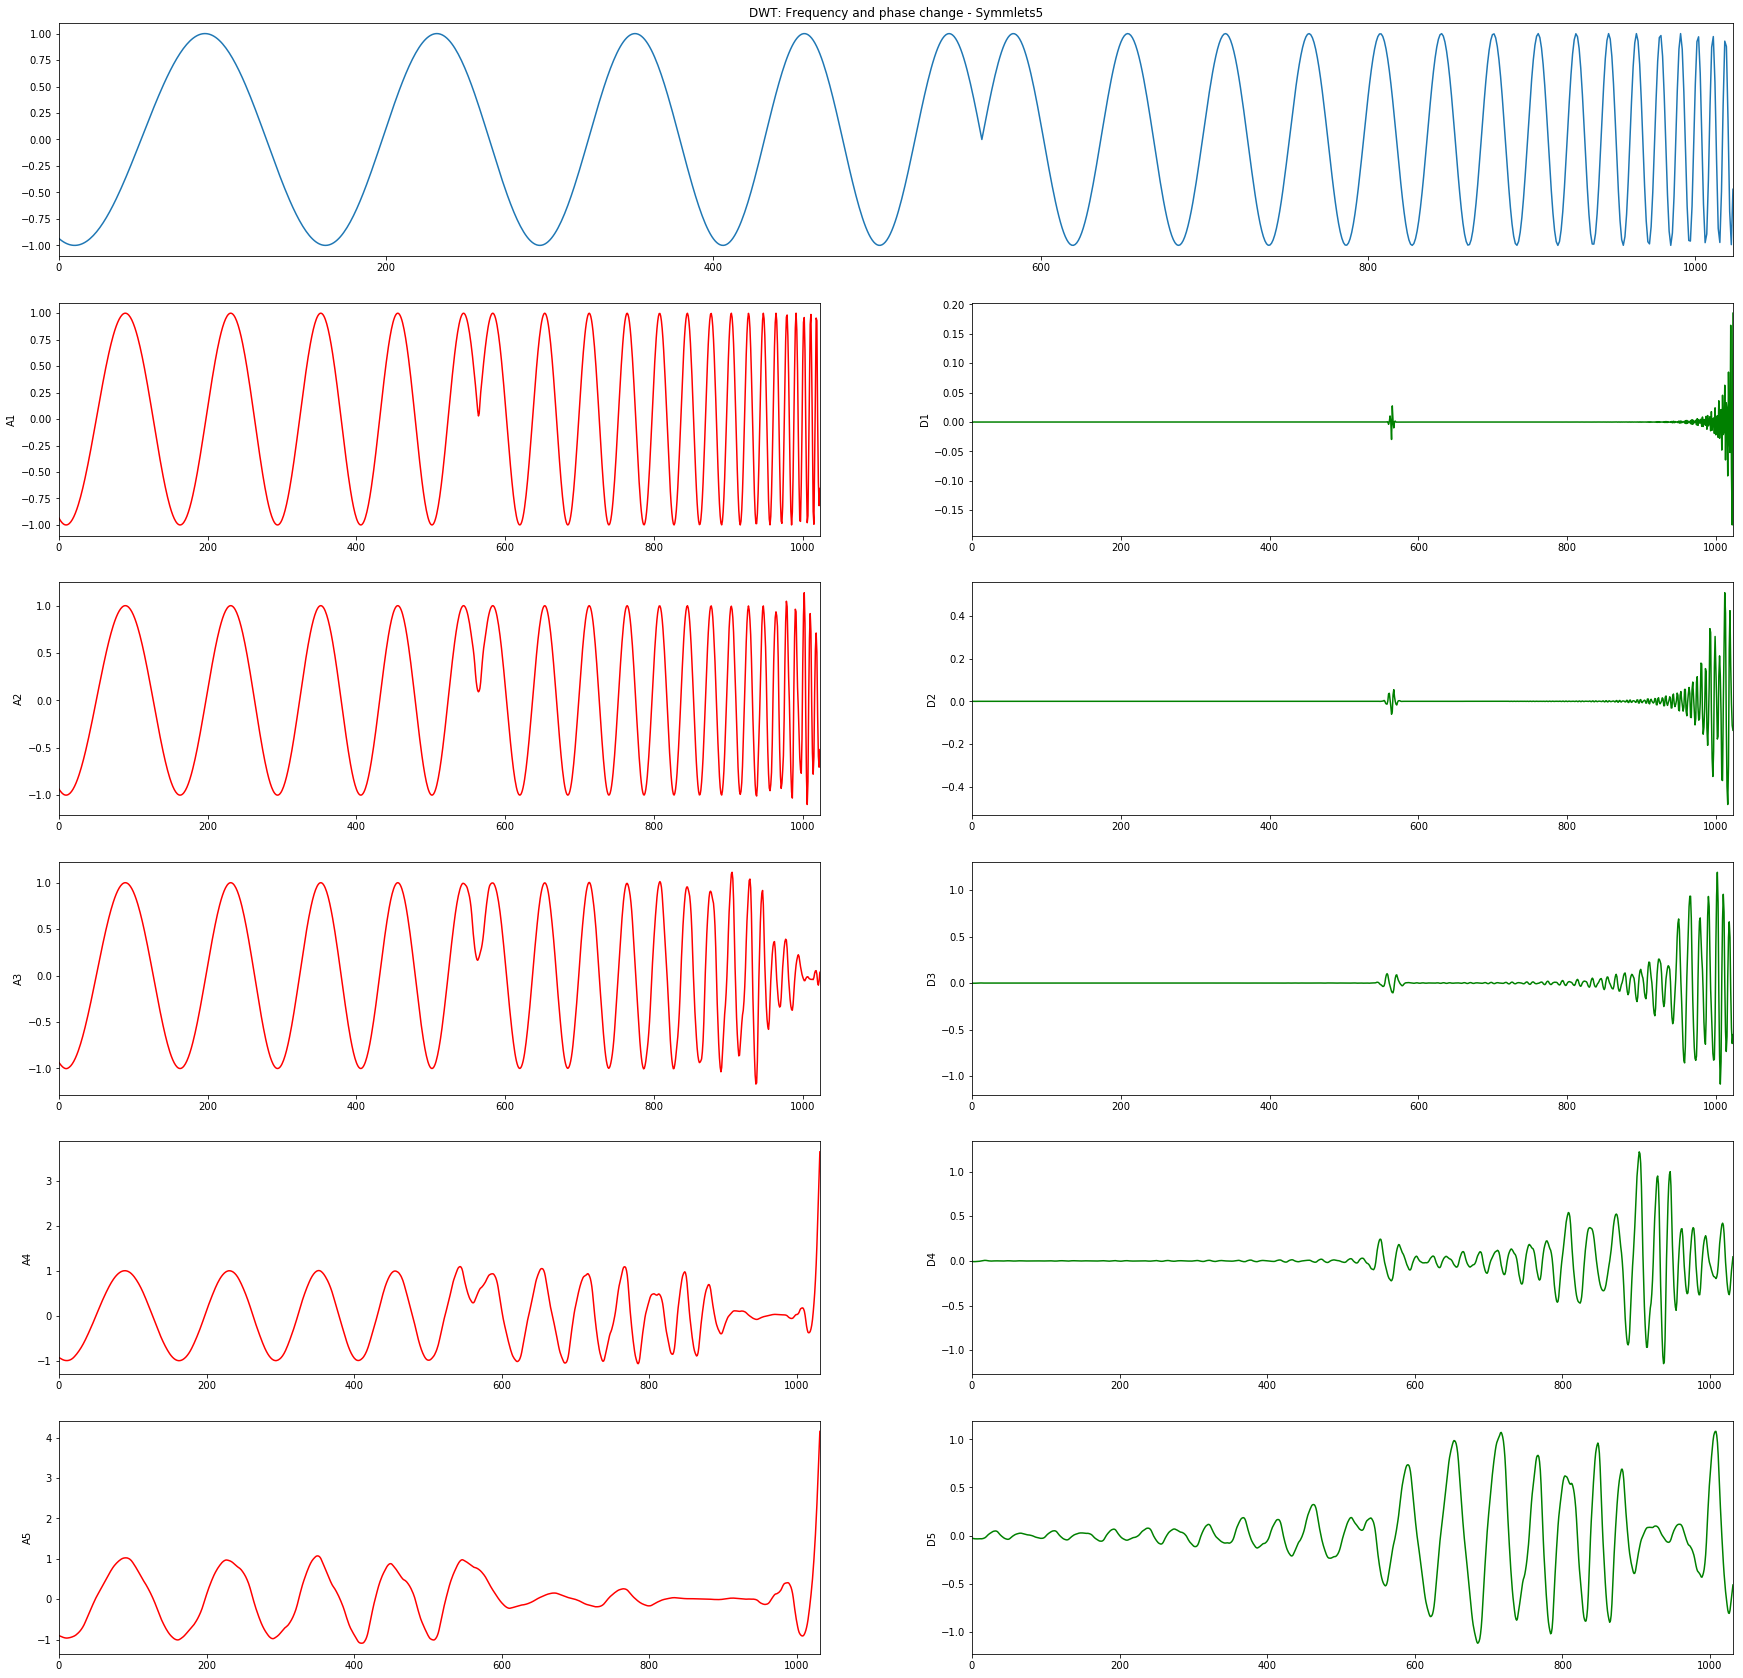

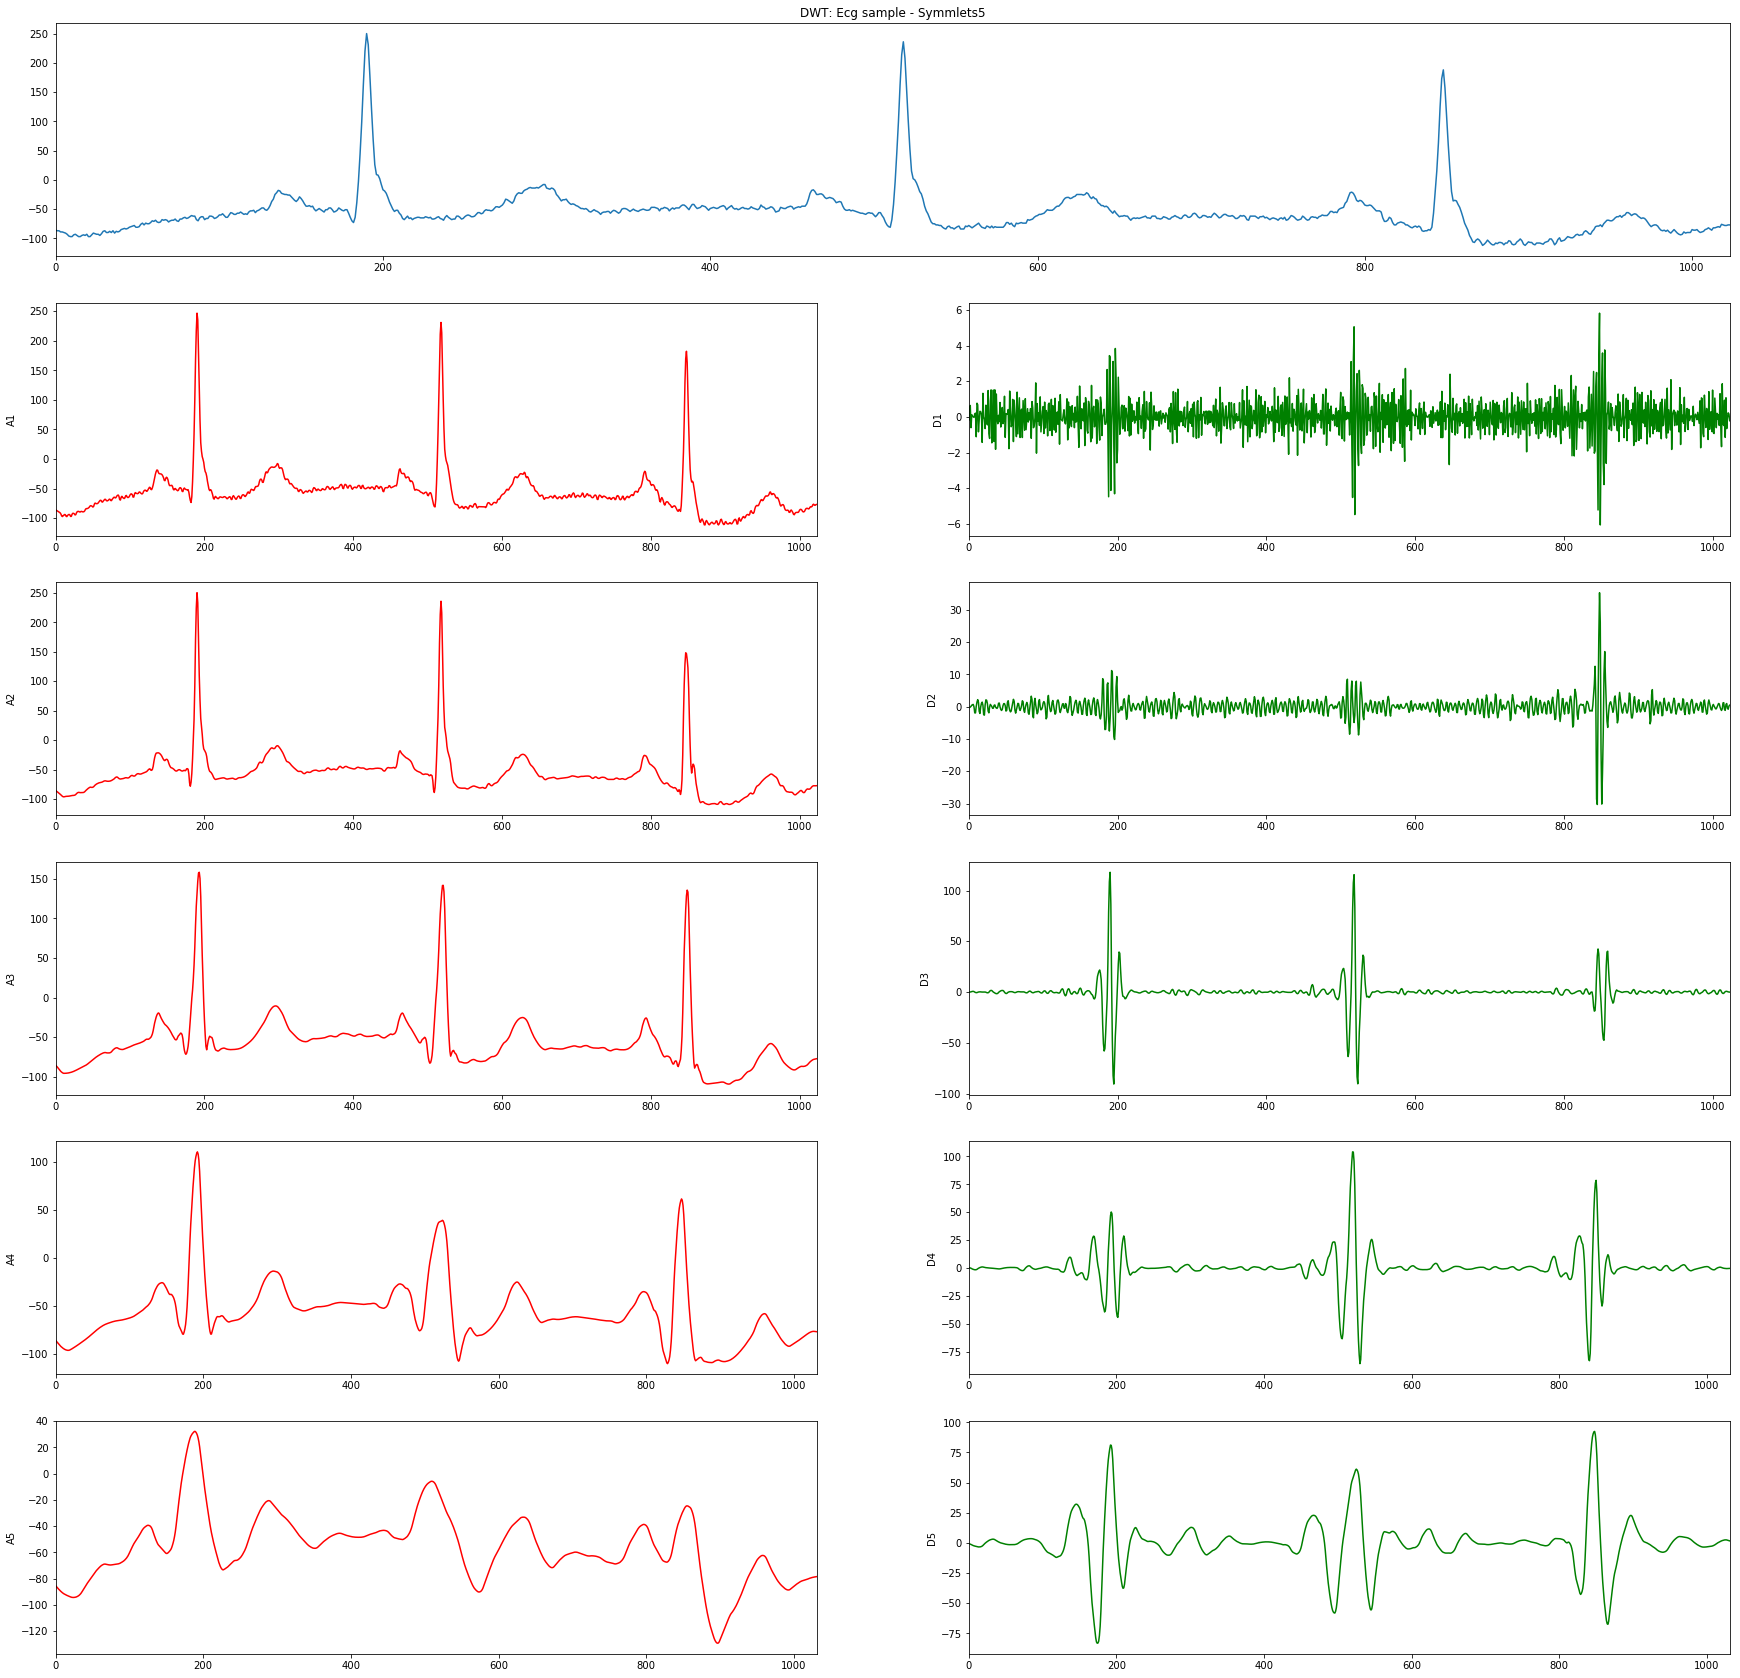

In [19]:
import numpy as np
import matplotlib.pyplot as plt

import pywt
import pywt.data


ecg = pywt.data.ecg()

data1 = np.concatenate((np.arange(1, 400),
                        np.arange(398, 600),
                        np.arange(601, 1024)))
x = np.linspace(0.082, 2.128, num=1024)[::-1]
data2 = np.sin(40 * np.log(x)) * np.sign((np.log(x)))

mode = pywt.Modes.smooth


def plot_signal_decomp(data, w, title):
    """Decompose and plot a signal S.
    S = An + Dn + Dn-1 + ... + D1
    """
    w = pywt.Wavelet(w)
    a = data
    ca = []
    cd = []
    for i in range(5):
        (a, d) = pywt.dwt(a, w, mode)
        ca.append(a)
        cd.append(d)

    rec_a = []
    rec_d = []

    for i, coeff in enumerate(ca):
        coeff_list = [coeff, None] + [None] * i
        rec_a.append(pywt.waverec(coeff_list, w))

    for i, coeff in enumerate(cd):
        coeff_list = [None, coeff] + [None] * i
        rec_d.append(pywt.waverec(coeff_list, w))

    fig = plt.figure(figsize=(30,30))
    ax_main = fig.add_subplot(len(rec_a) + 1, 1, 1)
    ax_main.set_title(title)
    ax_main.plot(data)
    ax_main.set_xlim(0, len(data) - 1)

    for i, y in enumerate(rec_a):
        ax = fig.add_subplot(len(rec_a) + 1, 2, 3 + i * 2)
        ax.plot(y, 'r')
        ax.set_xlim(0, len(y) - 1)
        ax.set_ylabel("A%d" % (i + 1))

    for i, y in enumerate(rec_d):
        ax = fig.add_subplot(len(rec_d) + 1, 2, 4 + i * 2)
        ax.plot(y, 'g')
        ax.set_xlim(0, len(y) - 1)
        ax.set_ylabel("D%d" % (i + 1))


plot_signal_decomp(data1, 'coif5', "DWT: Signal irregularity")
plot_signal_decomp(data2, 'sym5',
                   "DWT: Frequency and phase change - Symmlets5")
plot_signal_decomp(ecg, 'sym5', "DWT: Ecg sample - Symmlets5")


plt.show()

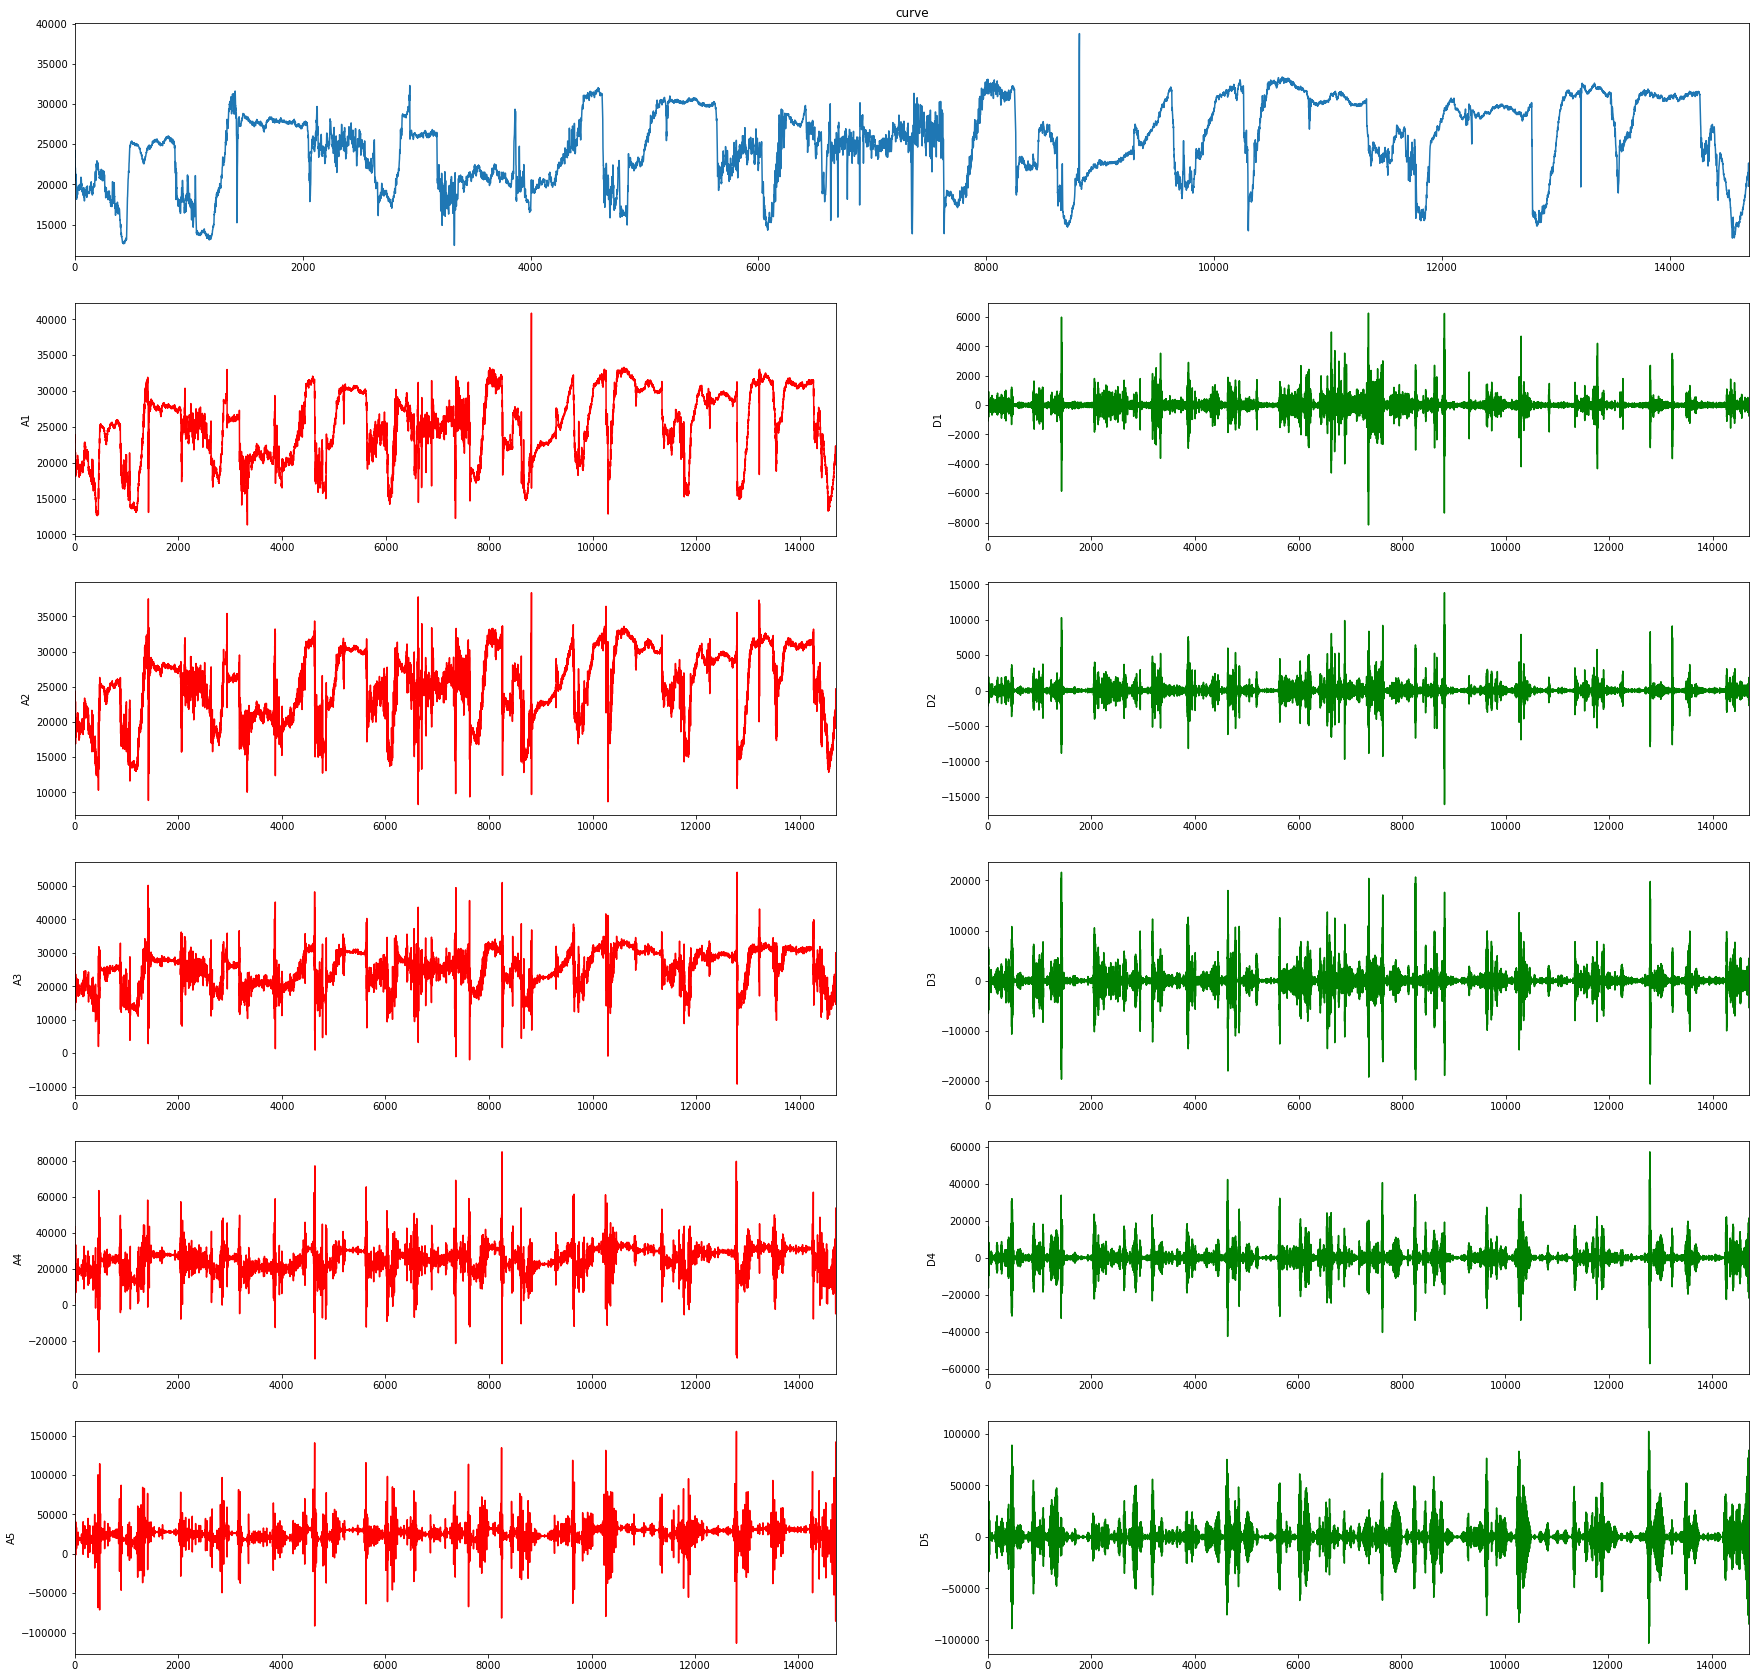

In [28]:
plot_signal_decomp(curve, 'rbio3.1', "curve")

In [21]:
pywt.wavelist()

['bior1.1',
 'bior1.3',
 'bior1.5',
 'bior2.2',
 'bior2.4',
 'bior2.6',
 'bior2.8',
 'bior3.1',
 'bior3.3',
 'bior3.5',
 'bior3.7',
 'bior3.9',
 'bior4.4',
 'bior5.5',
 'bior6.8',
 'cgau1',
 'cgau2',
 'cgau3',
 'cgau4',
 'cgau5',
 'cgau6',
 'cgau7',
 'cgau8',
 'cmor',
 'coif1',
 'coif2',
 'coif3',
 'coif4',
 'coif5',
 'coif6',
 'coif7',
 'coif8',
 'coif9',
 'coif10',
 'coif11',
 'coif12',
 'coif13',
 'coif14',
 'coif15',
 'coif16',
 'coif17',
 'db1',
 'db2',
 'db3',
 'db4',
 'db5',
 'db6',
 'db7',
 'db8',
 'db9',
 'db10',
 'db11',
 'db12',
 'db13',
 'db14',
 'db15',
 'db16',
 'db17',
 'db18',
 'db19',
 'db20',
 'db21',
 'db22',
 'db23',
 'db24',
 'db25',
 'db26',
 'db27',
 'db28',
 'db29',
 'db30',
 'db31',
 'db32',
 'db33',
 'db34',
 'db35',
 'db36',
 'db37',
 'db38',
 'dmey',
 'fbsp',
 'gaus1',
 'gaus2',
 'gaus3',
 'gaus4',
 'gaus5',
 'gaus6',
 'gaus7',
 'gaus8',
 'haar',
 'mexh',
 'morl',
 'rbio1.1',
 'rbio1.3',
 'rbio1.5',
 'rbio2.2',
 'rbio2.4',
 'rbio2.6',
 'rbio2.8',
 'rbio3.1',

In [24]:
curve = curve[~np.isnan(curve)]

In [25]:
curve.max()

38758.75

In [29]:
from sklearn.decomposition import PCA

In [30]:
col = np.load('sample_column.npy')

In [55]:
ncomps = range(2,40)
exp_var = []

for i in ncomps:
    pca = PCA(n_components=i)
    trans = pca.fit_transform(col)
    exp_var.append(pca.explained_variance_ratio_.sum())

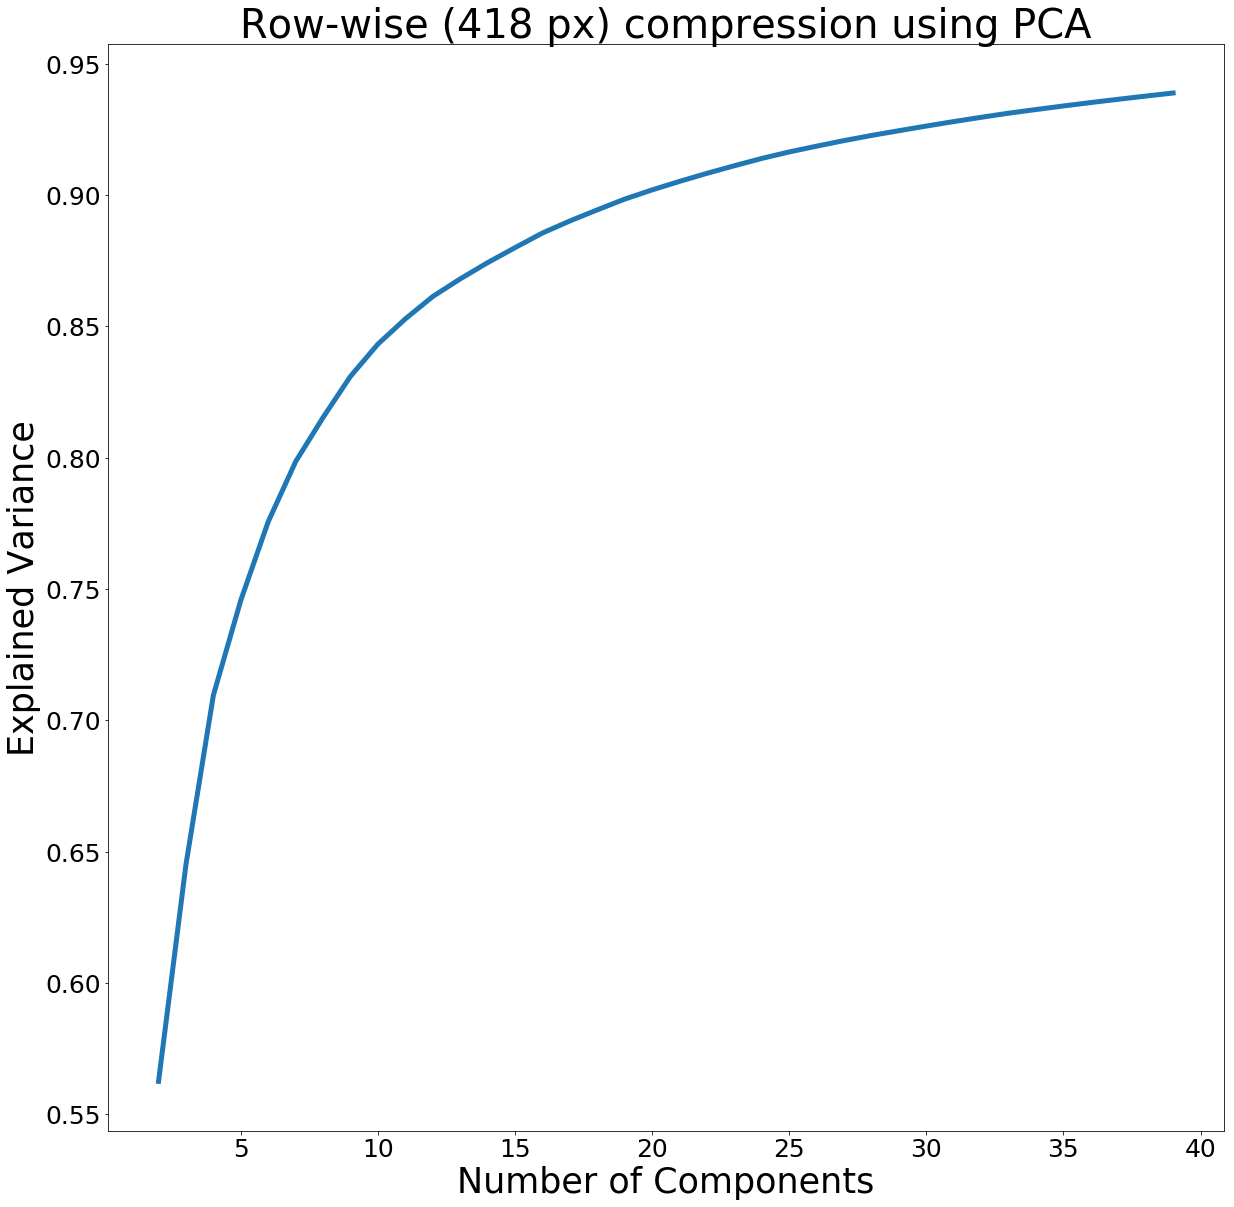

In [58]:
fig, ax = plt.subplots(figsize=(20,20))
ax.set_title("Row-wise (418 px) compression using PCA", size=40)
ax.set_xlabel("Number of Components", size=35)
ax.set_ylabel("Explained Variance", size=35)
ax.tick_params(labelsize=25)
ax.plot(ncomps, exp_var, linewidth=5)

In [61]:
pca = PCA(n_components=10)
trans = pca.fit_transform(col)

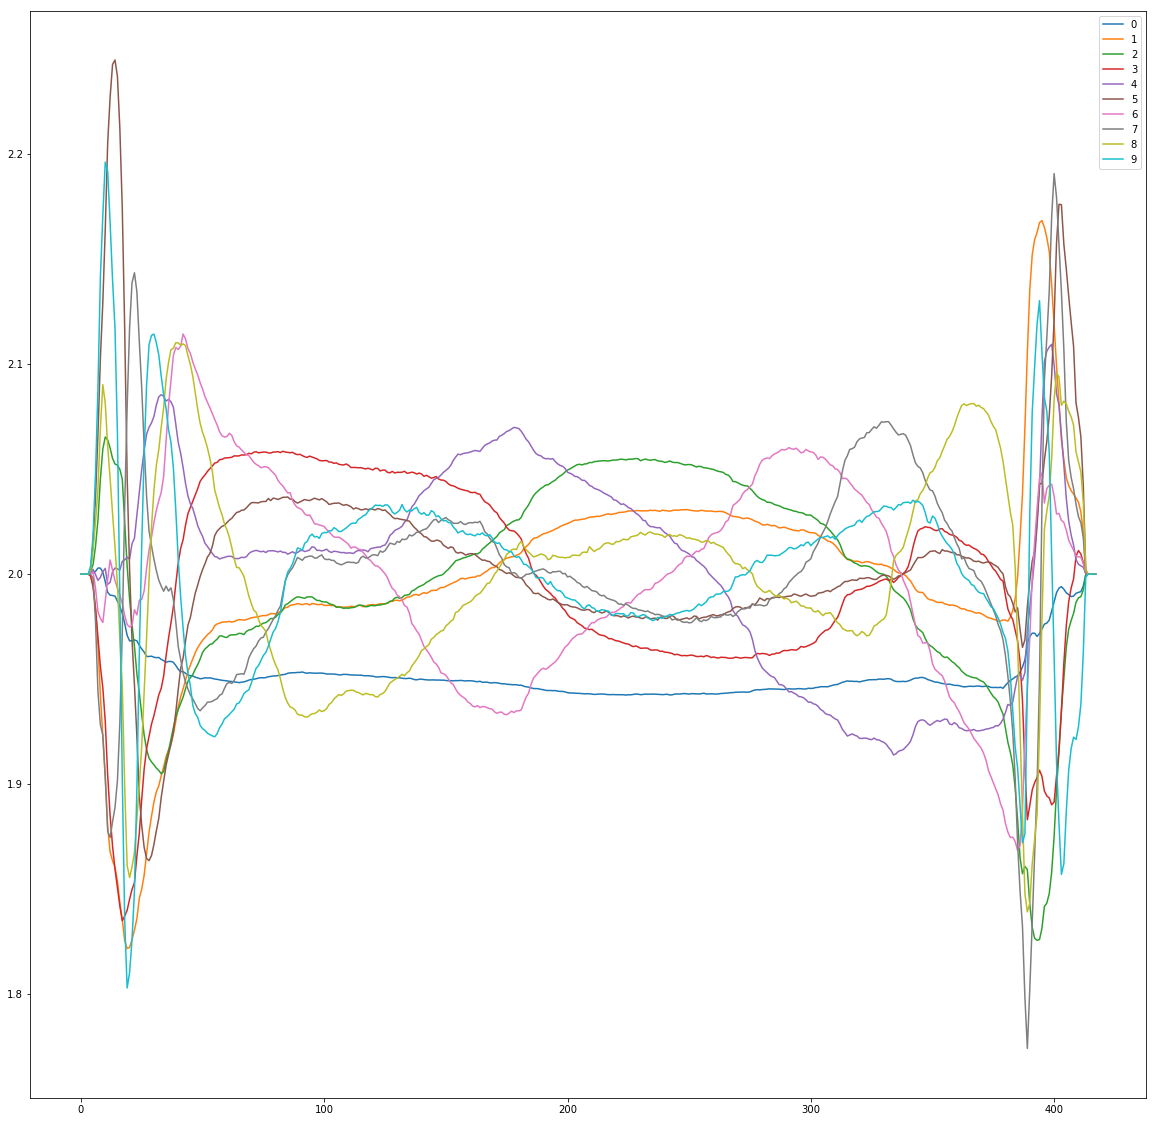

In [90]:
fig, ax = plt.subplots(figsize=(20,20))

x = np.arange(pca.components_[0].size)

for i, comp in enumerate(pca.components_):
    ax.plot(x, comp, label=str(i))
ax.legend()

In [82]:
recons = pca.inverse_transform(trans)
recons_normed = (recons - recons.min())/(recons.max()-recons.min())

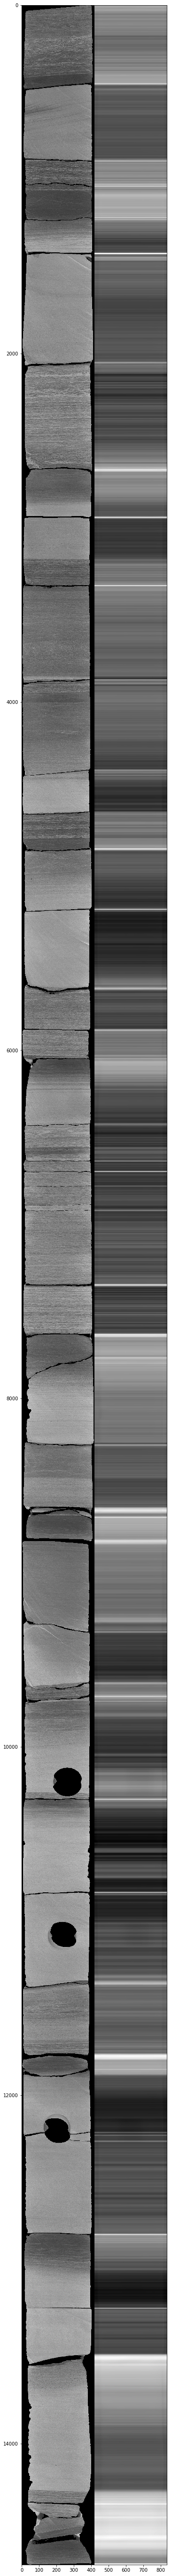

In [85]:
fig, ax = plt.subplots(figsize=(500,100))
ax.imshow(np.concatenate([col/col.max(), recons_normed], axis=1),aspect= cmap='gray')

In [74]:
col.max()

48995

In [84]:
recons_normed.max()

1.0

In [83]:
recons_normed.min()

0.0

In [86]:
from scipy import signal

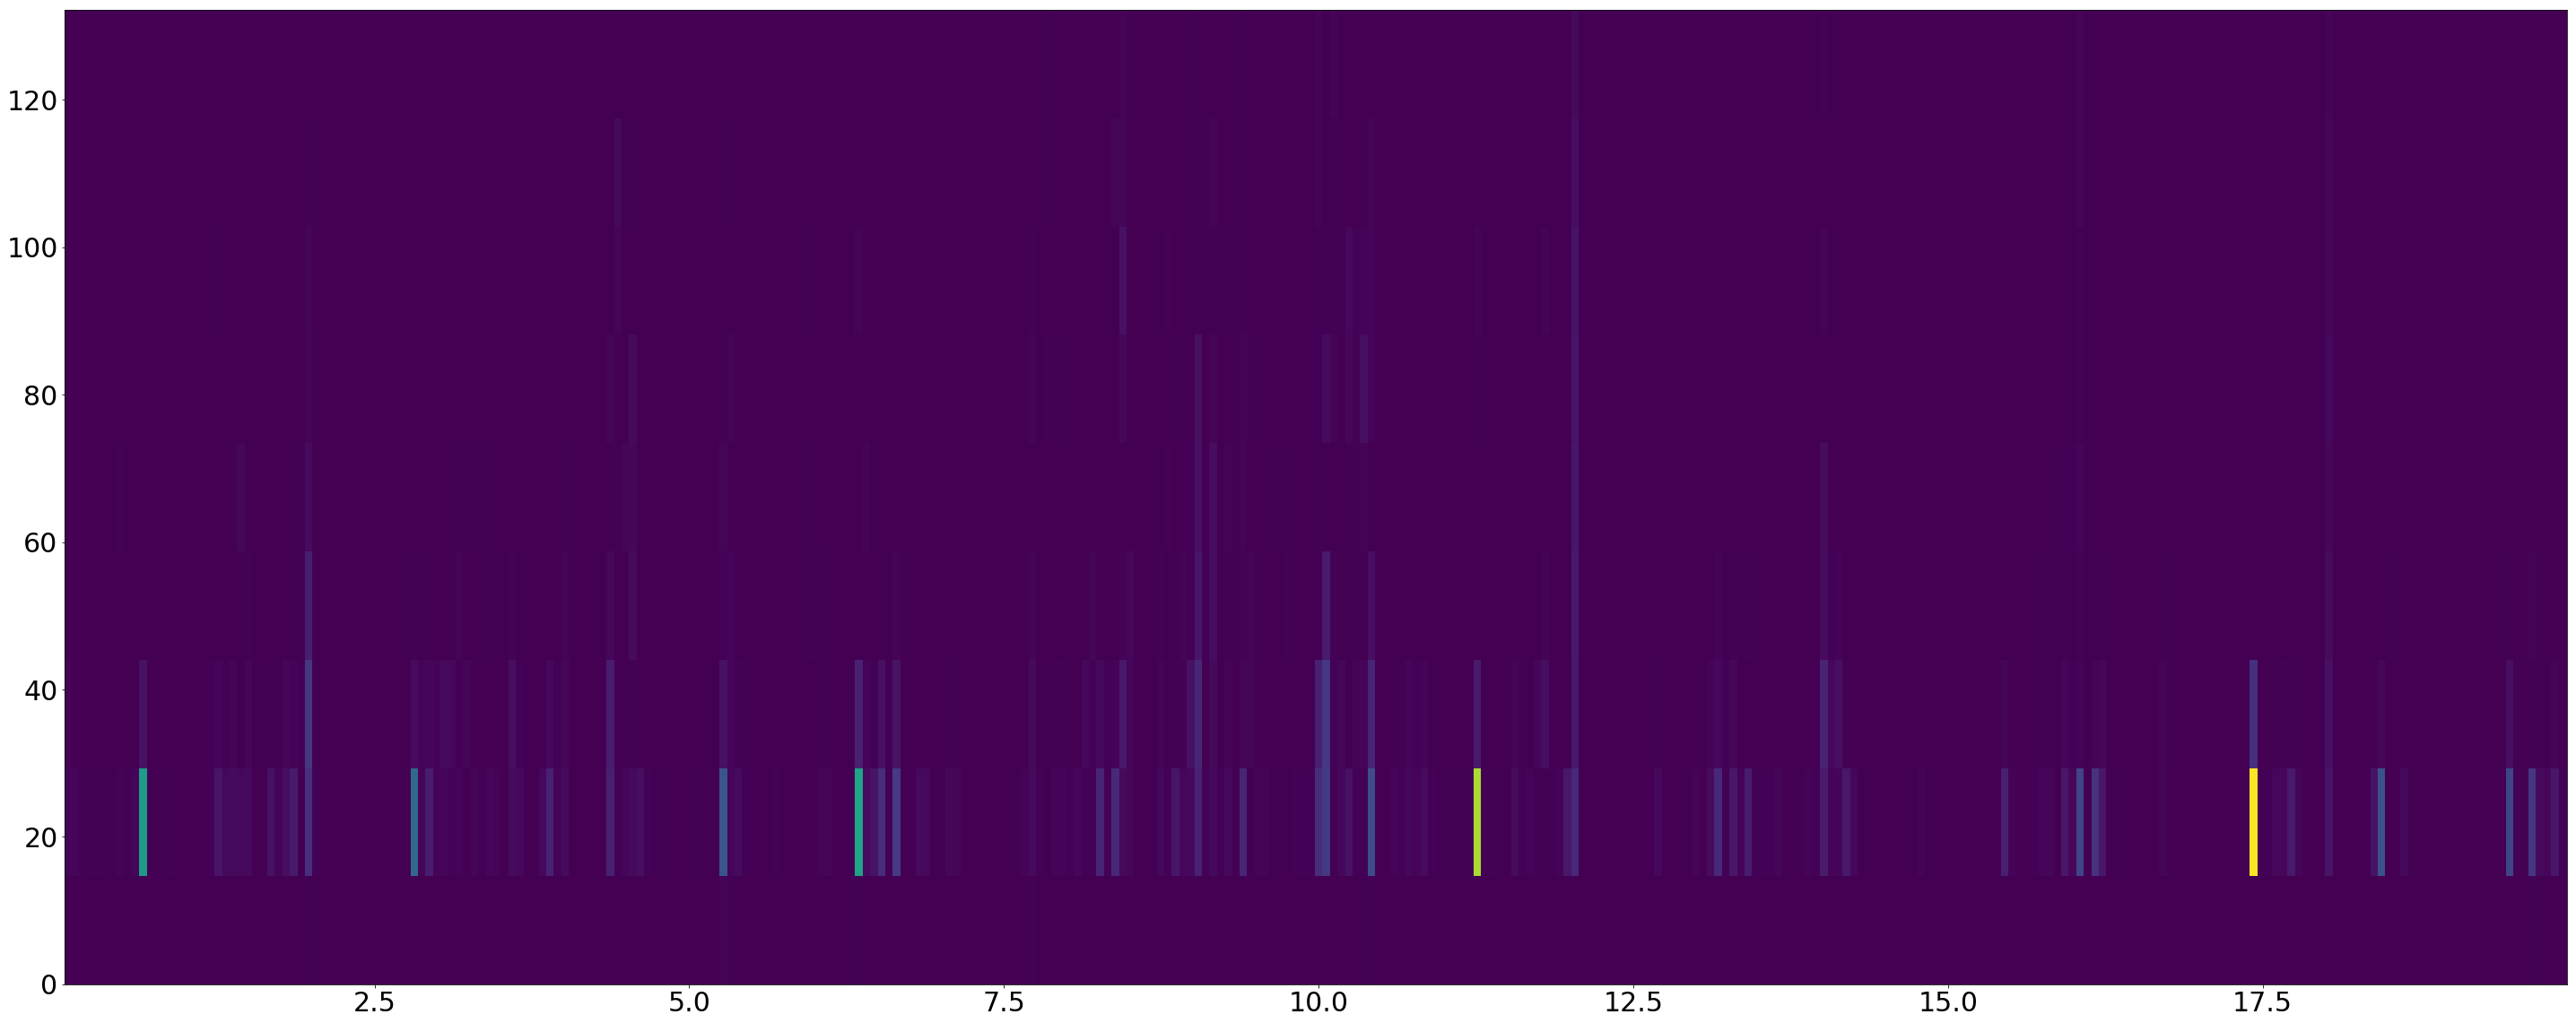

In [117]:
f, t, Sxx = signal.spectrogram(curve, fs=curve.size/20, nperseg=50)
fig, ax = plt.subplots(figsize=(50,20))
ax.pcolormesh(t, f[:10], Sxx[:10,:])
ax.tick_params(labelsize=30)

In [92]:
t.shape

(65,)

In [93]:
f.shape

(129,)

In [94]:
Sxx.shape

(129, 65)

In [100]:
f.max()

0.00068050357264375636

(array([ 127.,    0.,    1.,    0.,    0.,    0.,    0.,    0.,    0.,    1.]),
 array([  6.40543765e-01,   2.89722188e+04,   5.79437971e+04,
          8.69153754e+04,   1.15886954e+05,   1.44858532e+05,
          1.73830110e+05,   2.02801689e+05,   2.31773267e+05,
          2.60744845e+05,   2.89716423e+05]),
 <a list of 10 Patch objects>)

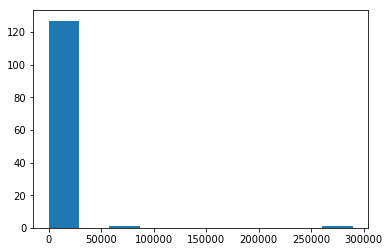

In [110]:
plt.hist(Sxx[:,0])

(array([ 127.,    0.,    0.,    1.,    0.,    0.,    0.,    0.,    0.,    1.]),
 array([  4.10690433e+00,   3.55030167e+05,   7.10056227e+05,
          1.06508229e+06,   1.42010835e+06,   1.77513441e+06,
          2.13016047e+06,   2.48518653e+06,   2.84021259e+06,
          3.19523865e+06,   3.55026471e+06]),
 <a list of 10 Patch objects>)

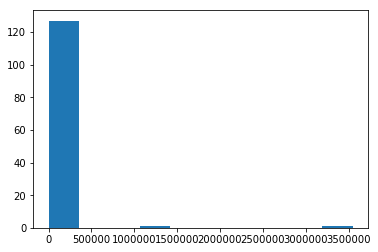

In [111]:
plt.hist(Sxx[:,-1])

In [118]:
from scipy.signal import butter, lfilter

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

## Continuous Wavelet Transform

In [165]:
c_wavelets = pywt.wavelist(kind='continuous')
good_wvlts = []

# list real-valued continuous wavelets
for wvlt in c_wavelets:
    wavelet = pywt.ContinuousWavelet(wvlt)
    if not wavelet.complex_cwt:
        good_wvlts.append(wvlt)
        print(wavelet, end='\n\n')

ContinuousWavelet gaus1
  Family name:    Gaussian
  Short name:     gaus
  Symmetry:       anti-symmetric
  DWT:            False
  CWT:            True
  Complex CWT:    False

ContinuousWavelet gaus2
  Family name:    Gaussian
  Short name:     gaus
  Symmetry:       symmetric
  DWT:            False
  CWT:            True
  Complex CWT:    False

ContinuousWavelet gaus3
  Family name:    Gaussian
  Short name:     gaus
  Symmetry:       anti-symmetric
  DWT:            False
  CWT:            True
  Complex CWT:    False

ContinuousWavelet gaus4
  Family name:    Gaussian
  Short name:     gaus
  Symmetry:       symmetric
  DWT:            False
  CWT:            True
  Complex CWT:    False

ContinuousWavelet gaus5
  Family name:    Gaussian
  Short name:     gaus
  Symmetry:       anti-symmetric
  DWT:            False
  CWT:            True
  Complex CWT:    False

ContinuousWavelet gaus6
  Family name:    Gaussian
  Short name:     gaus
  Symmetry:       symmetric
  DWT:       

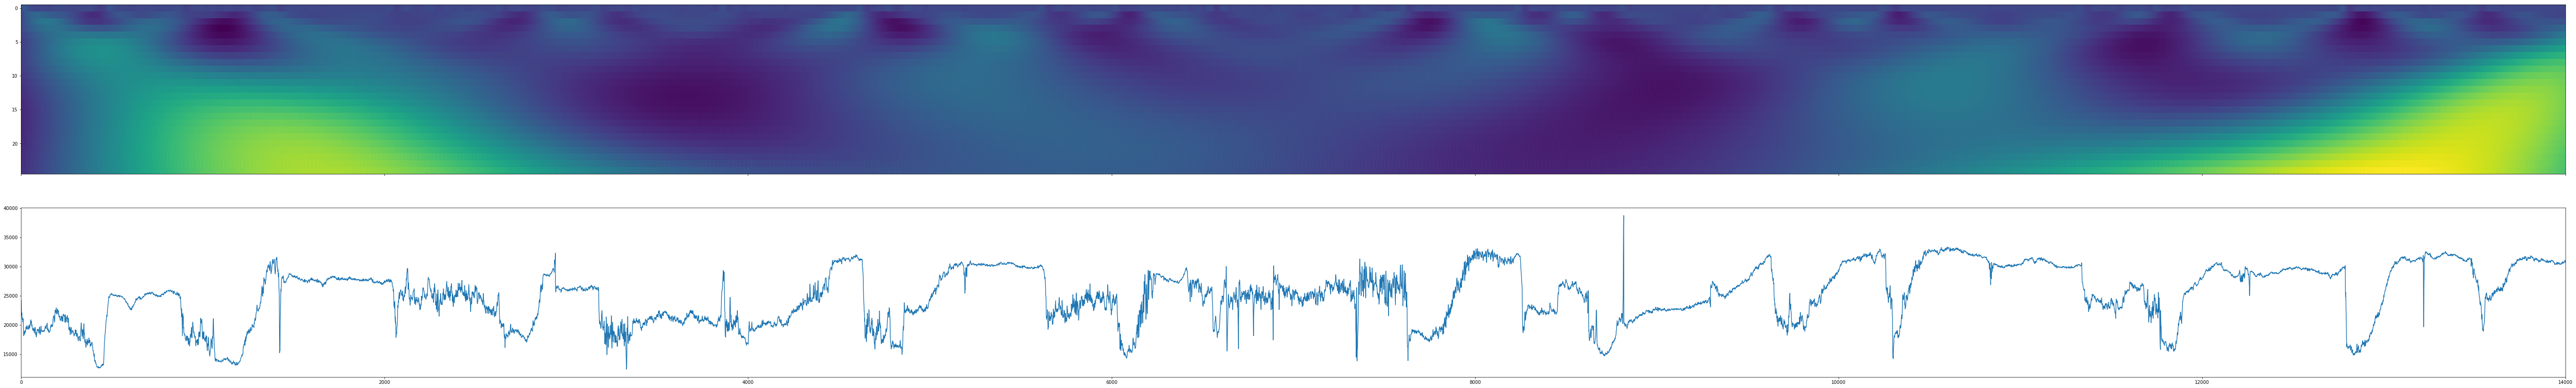

In [164]:
# 2nd-order Gaussian

scales = np.linspace(30,int(curve.size*(2/20)), num=25)     # ~0.25 to 24 inches
sample_period = (20*12)/curve.size                     # in inches

coef, freqs=pywt.cwt(curve, scales, 'gaus2', sampling_period=sample_period)

fig, ax = plt.subplots(2, figsize=(100,15), sharex=True)
ax[0].set_xlim(0,14000)
ax[0].imshow(coef[:,:14000], aspect='auto')
ax[1].plot(np.arange(14000), curve[:14000])

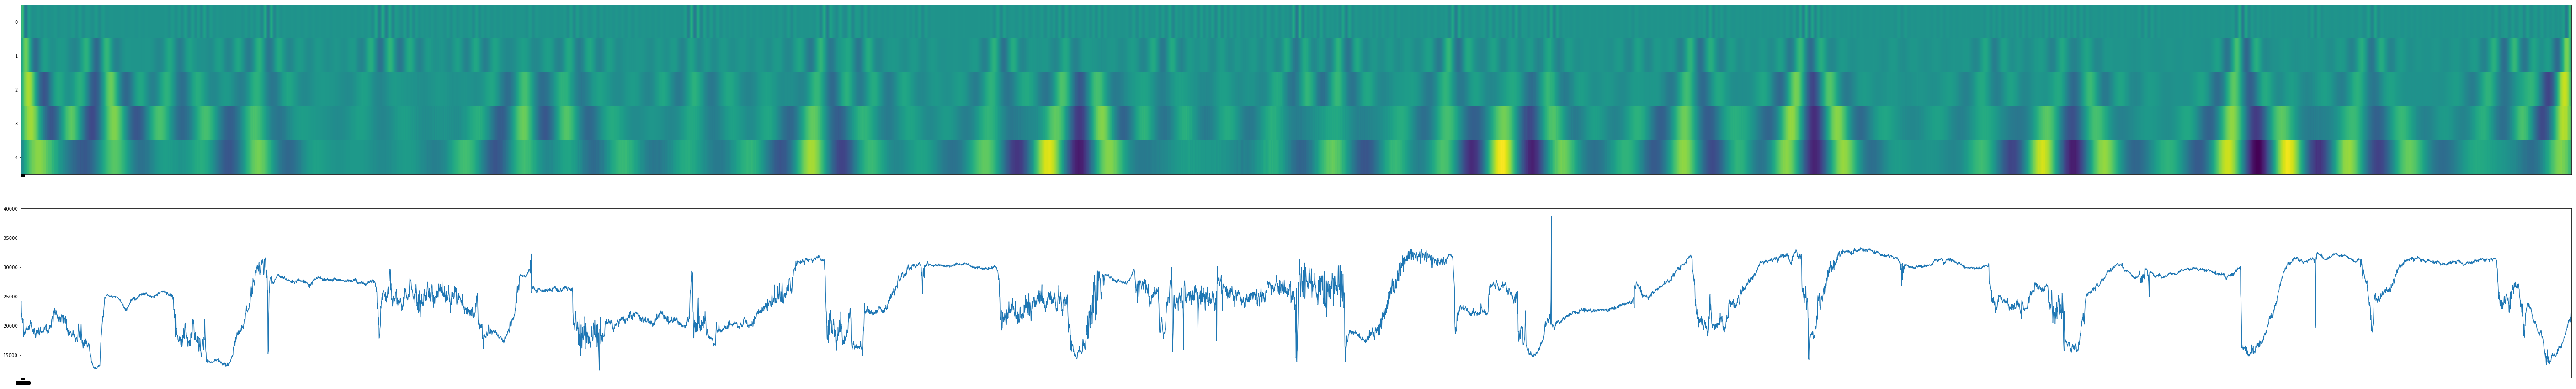

In [174]:
# Morlet ~ Gabor transform

scales = np.linspace(30,int(curve.size*(2/20)), num=25)     # ~0.25 to 24 inches
sample_period = (20*12)/curve.size                     # in inches

coef, freqs=pywt.cwt(curve, scales, 'morl', sampling_period=sample_period)

fig, ax = plt.subplots(2, figsize=(100,15), sharex=True)
ax[0].set_xlim(0,curve.size)
ax[0].xaxis.set_ticks(np.linspace(0, 20, num=curve.size))
ax[0].imshow(coef[0:5,:], aspect='auto')
ax[1].plot(np.arange(curve.size), curve)

Wavelet name:  gaus1


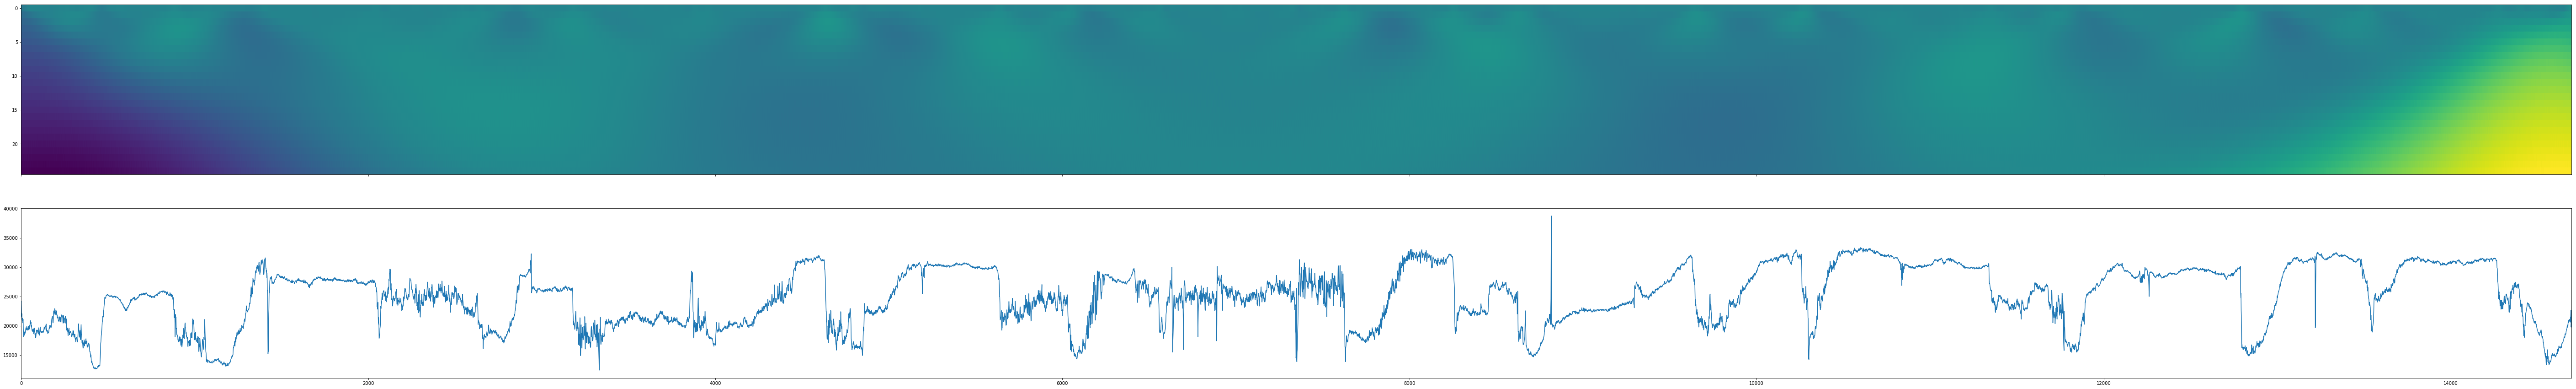

Wavelet name:  gaus2


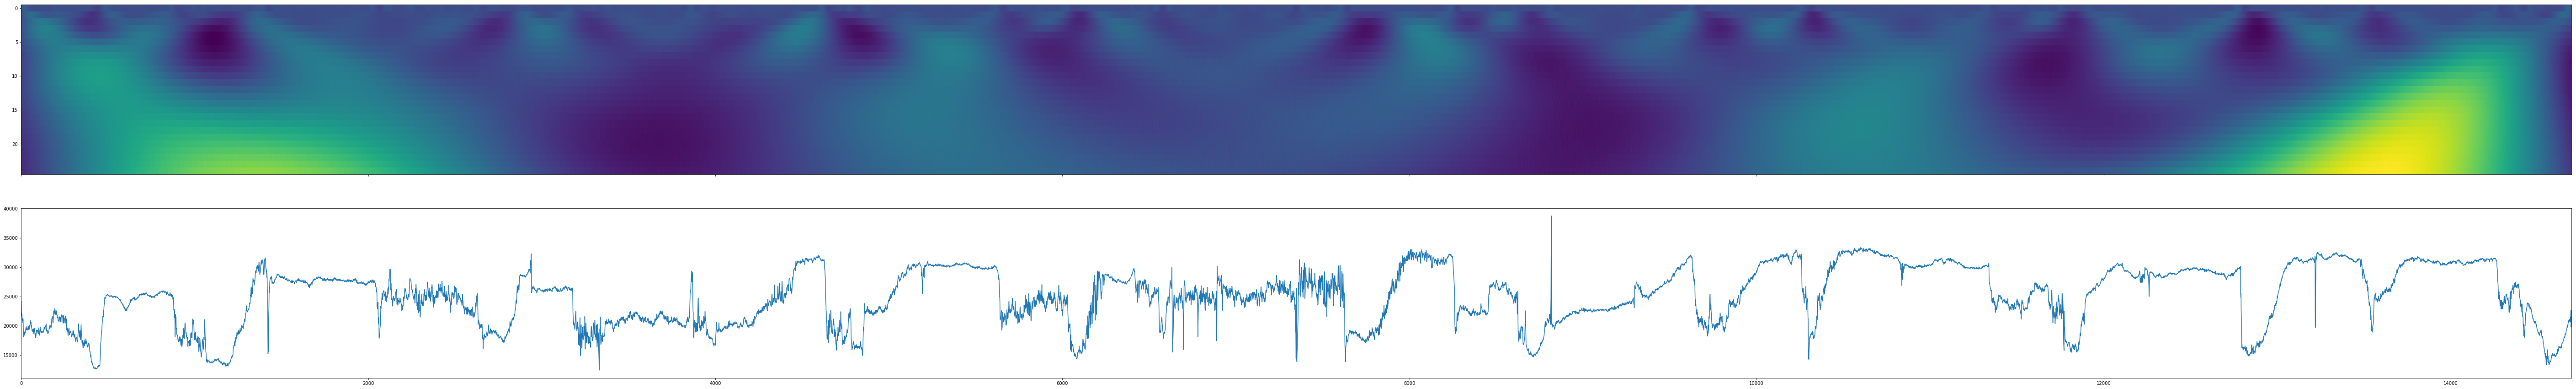

Wavelet name:  gaus3


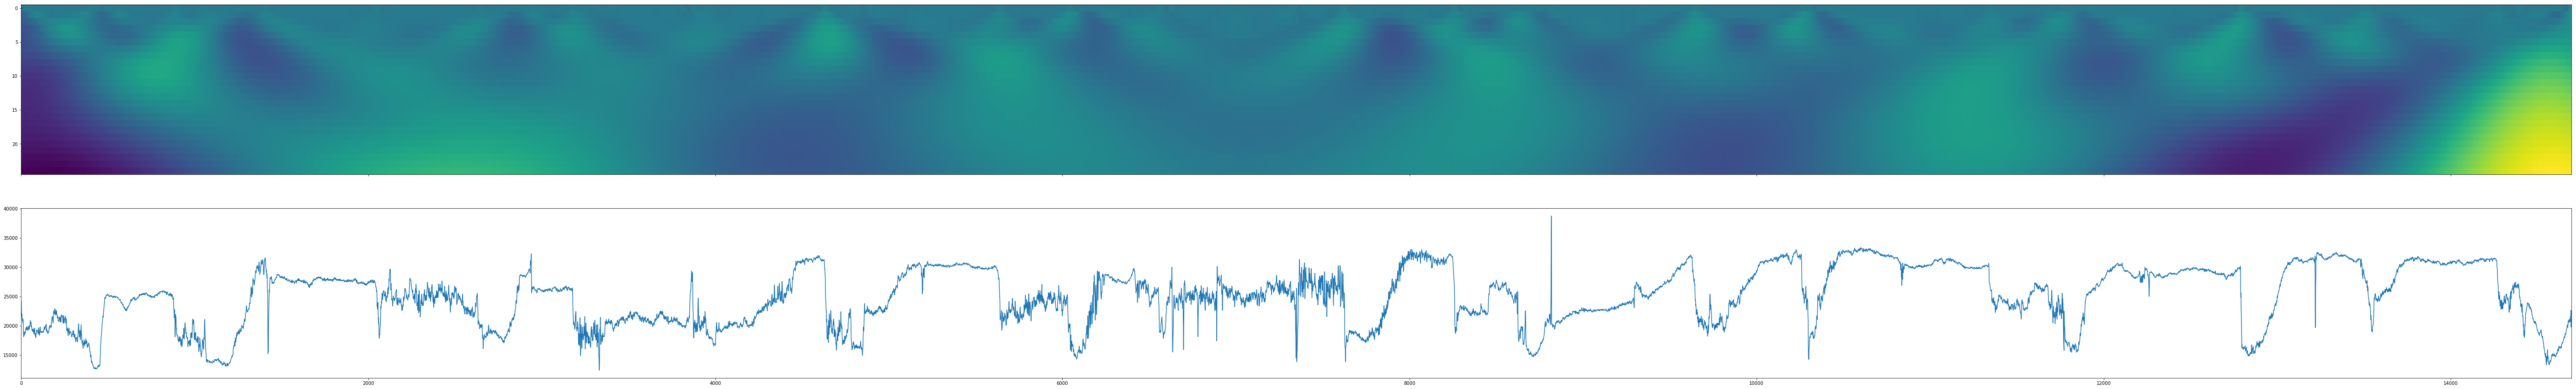

Wavelet name:  gaus4


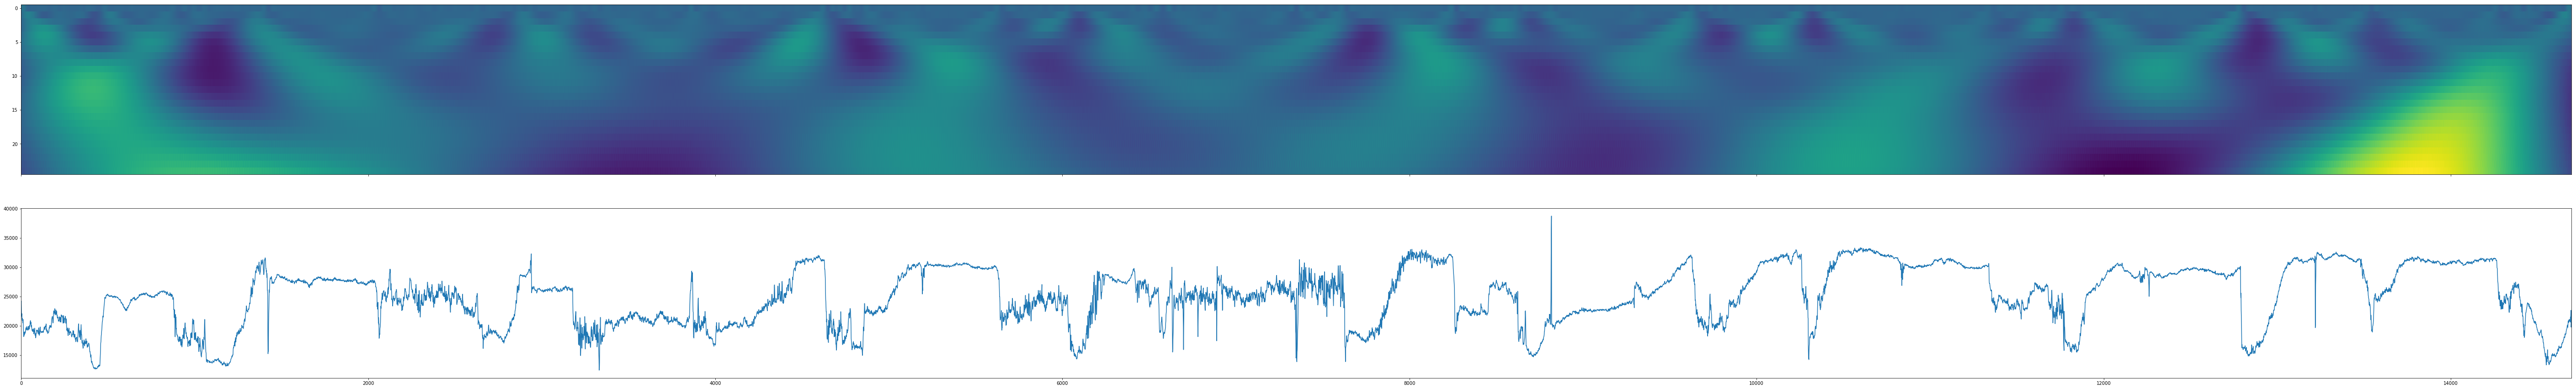

Wavelet name:  gaus5


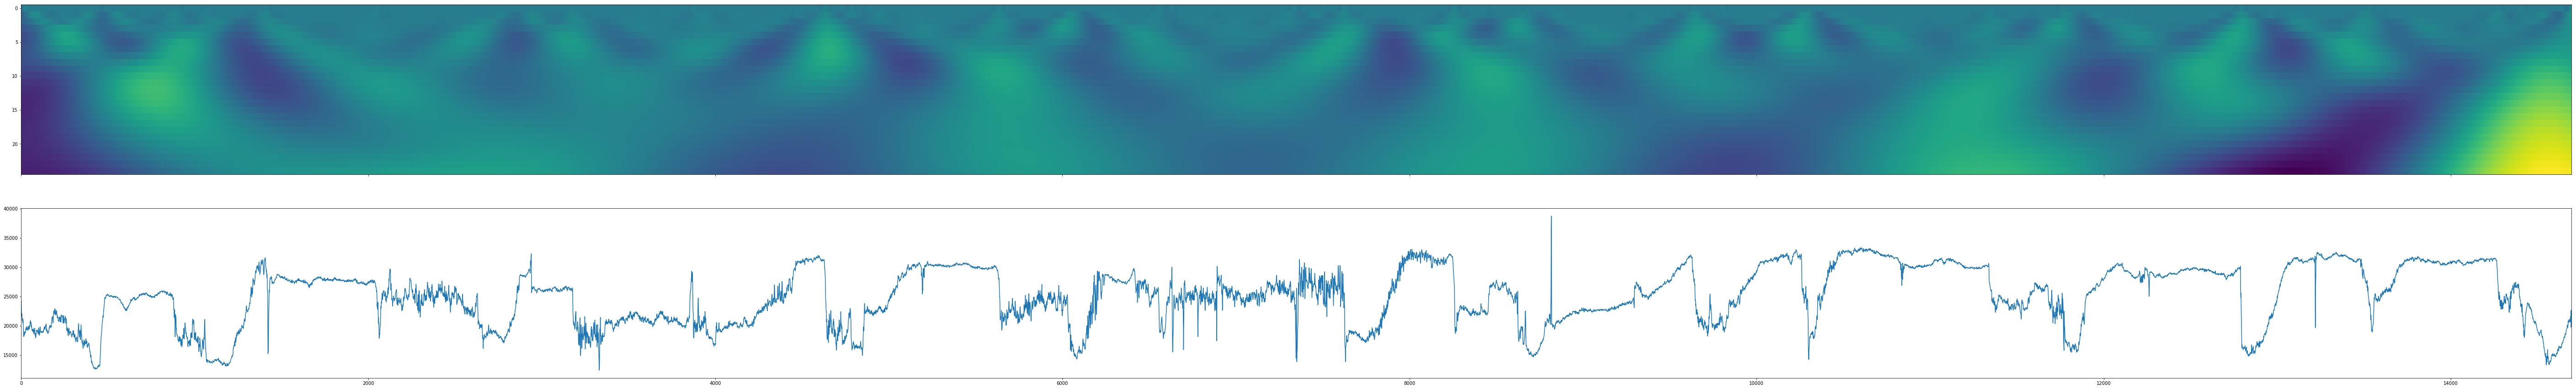

Wavelet name:  gaus6


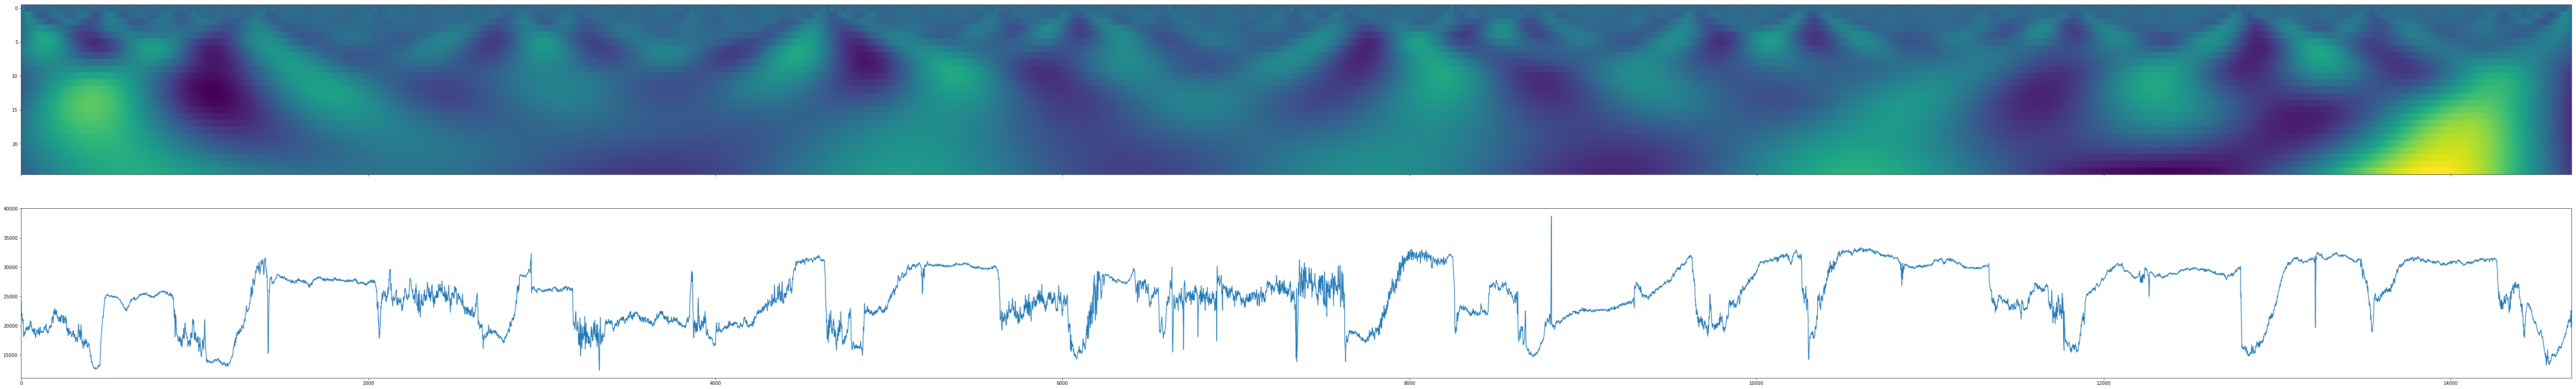

Wavelet name:  gaus7


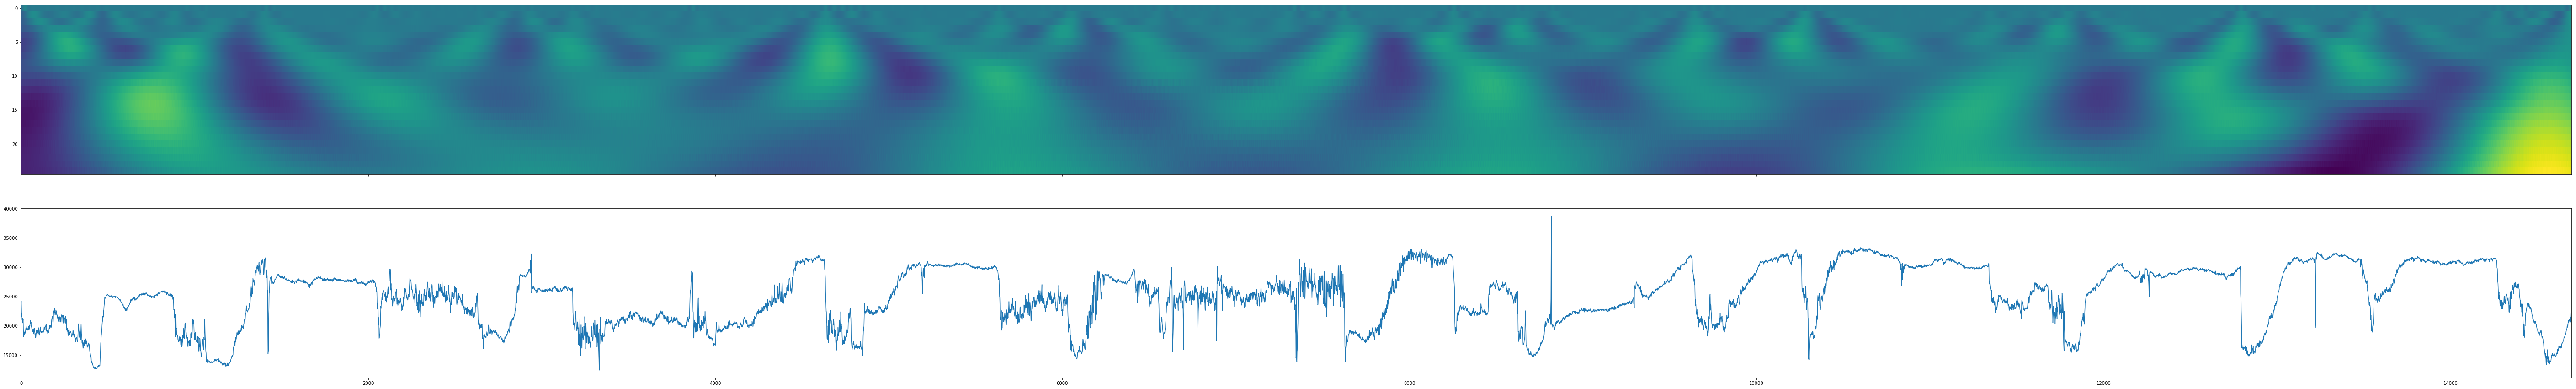

Wavelet name:  gaus8


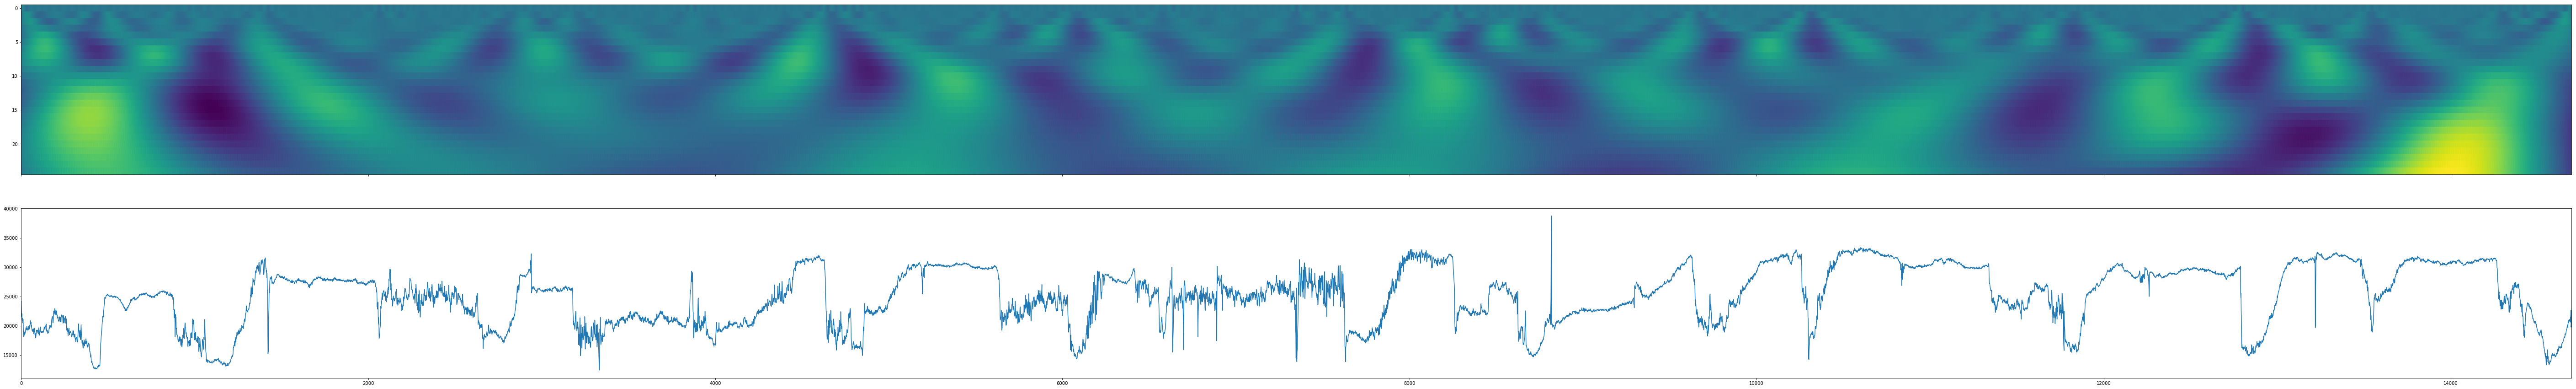

Wavelet name:  mexh


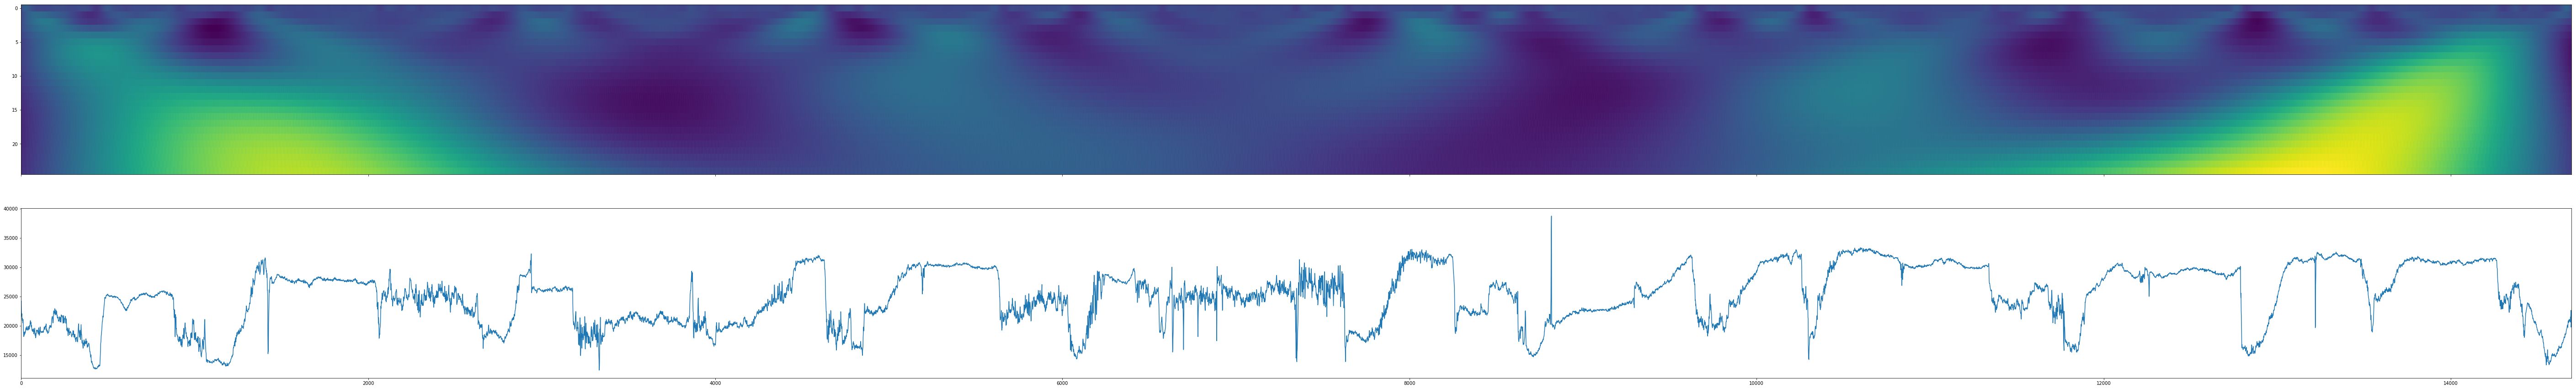

Wavelet name:  morl


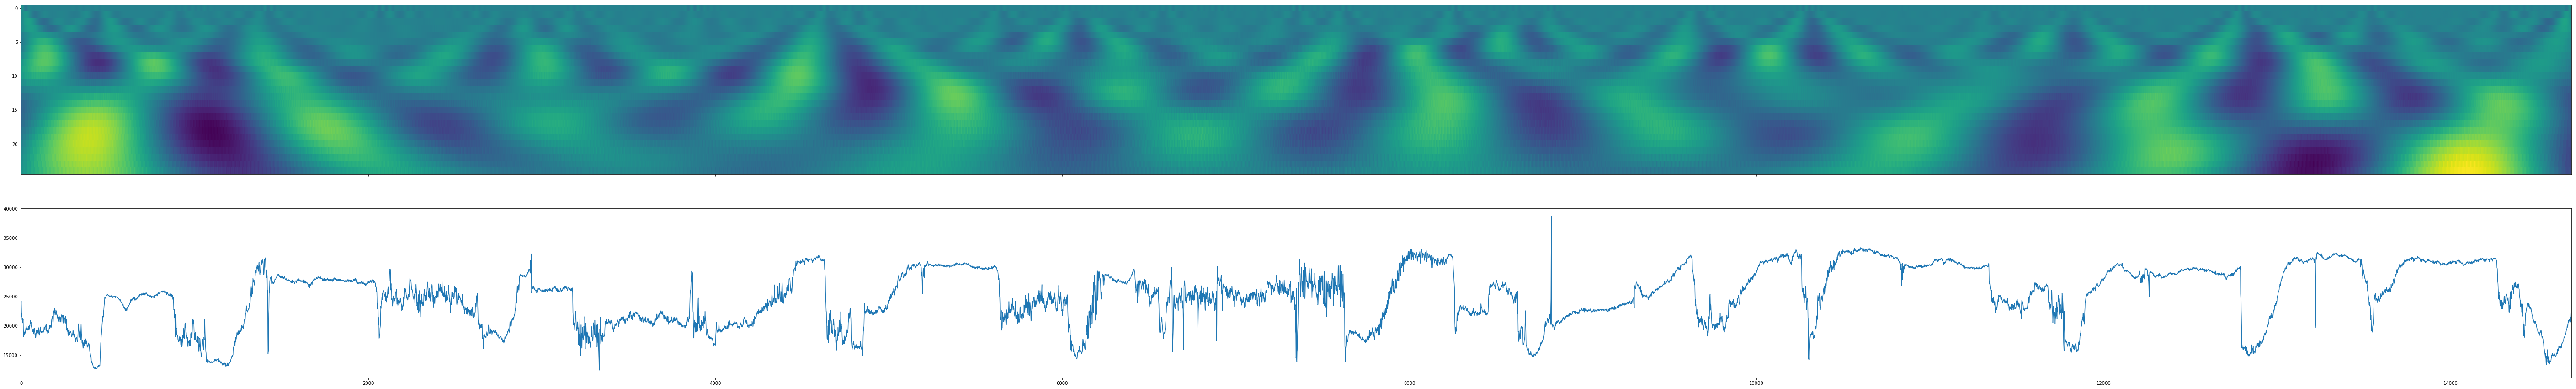

In [169]:
# try all the built-in real continuous wavelets

scales = np.linspace(30,int(curve.size*(2/20)), num=25)     # ~0.25 to 24 inches
sample_period = (20*12)/curve.size                     # in inches

for wvlt in good_wvlts:
    coef, freqs=pywt.cwt(curve, scales, wvlt, sampling_period=sample_period)

    print("Wavelet name: ", wvlt)
    fig, ax = plt.subplots(2, figsize=(100,15), sharex=True)
    ax[0].set_xlim(0,curve.size)
    #ax[0].imshow(coef[:,:14000], aspect='auto')
    ax[0].imshow(coef, aspect='auto')
    ax[1].plot(np.arange(curve.size), curve)
    plt.show()

In [175]:
freqs

array([ 1.65828993,  0.55301934,  0.33184234,  0.23703966,  0.18436824,
        0.15084886,  0.12764259,  0.11062436,  0.09761026,  0.08733588,
        0.07901845,  0.07214749,  0.06637585,  0.06145924,  0.05722078,
        0.0535292 ,  0.05028507,  0.0474117 ,  0.04484895,  0.04254904,
        0.04047352,  0.03859106,  0.03687593,  0.03530676,  0.03386569])

In [176]:
1/0.033

30.3030303030303

In [178]:
col.shape

(14696, 418)